In [3]:
import numpy as np
import scipy.stats as scs
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.stats.weightstats import ztest
%matplotlib inline

## CENTRAL LIMIT THEOREM 

In [4]:
def plot_weird_distribution():
    '''
    Plots bimodal poisson distribution for visualization purposes only
    '''
    x = np.linspace(0, 100, 101)
    y = 0.25*scs.poisson(25).pmf(x) + 0.75*scs.poisson(50).pmf(x)
    fig = plt.figure(figsize = (12, 8))
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_ylabel('Probability Density', size = 'x-large')
    ax.set_title('Not a normal distribution!', size='xx-large')

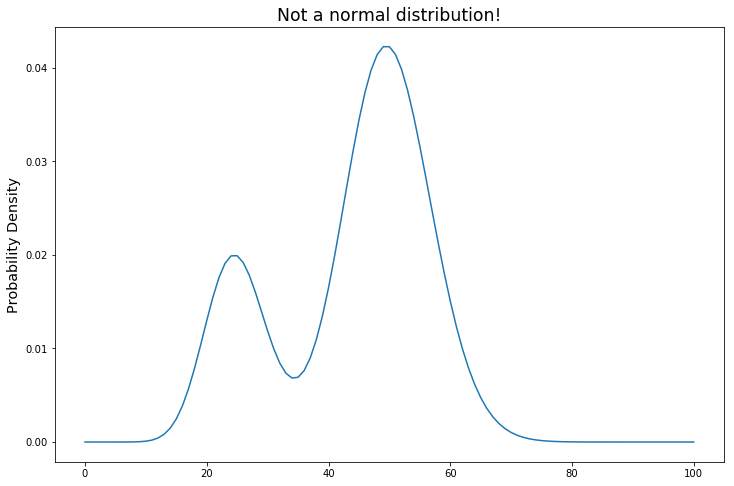

In [5]:
plot_weird_distribution()

In [6]:
def sample_weird_distribution(n_samples):
    '''
    returns n_samples from weird poisson distibution
    '''
    return np.hstack((scs.poisson(25).rvs(int(0.25*n_samples)), scs.poisson(50).rvs(int(0.75*n_samples))))

##### For reference, we expect the mean of this distribution to be:
```
E(X) = 0.25*E(X~POISSON(25)) + 0.75*E(X~POISSON(50))
     = 0.25*25 + 0.75*50
     = 43.75
```     

In [7]:
x = sample_weird_distribution(100)
x.mean()

42.439999999999998

In [8]:
def many_sample_means(n_samples, n_draws = 1000):
    '''
    returns an array of n_draws means from the weird distribution
    '''
    means_list = []
    for _ in range(n_draws):
        x = sample_weird_distribution(n_samples)
        means_list.append(x.mean())
    return np.array(means_list)

In [9]:
def plot_draws(sample_sizes):
    '''
    plots distributions
    '''
    # generic subplot arrangement - won't always be pretty
    n_rows = math.ceil(np.sqrt(len(sample_sizes)))
    n_cols = math.ceil(len(sample_sizes)/ n_rows)
    
    # instantiate figure:
    fig = plt.figure(figsize = (10, 8))
    # add subplots
    for i, size in enumerate(sample_sizes):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        # get means
        means = many_sample_means(size)
        # plot histogram
        ax.hist(means, bins = 30, normed = True, label = 'N = {}'.format(size))
        # draw a vertical line for the mean
        ax.vlines(43.75, 0, 6)
        ax.set_xlim(41, 46.5)
        ax.set_ylim(0, 5)
        ax.legend(loc = 'upper left')
    fig.suptitle('Distribution of sample means', size = 'xx-large')


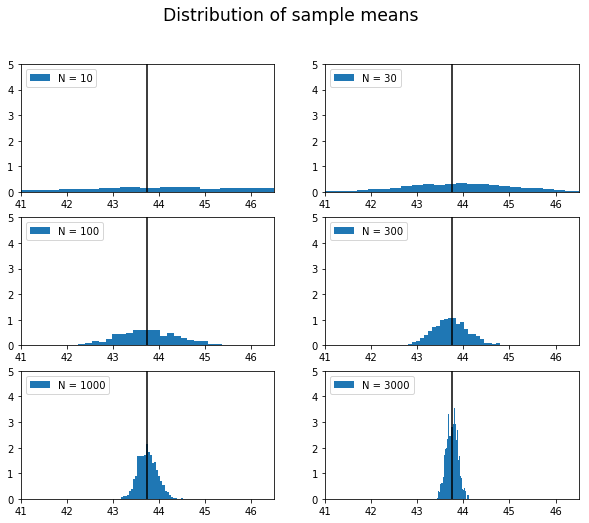

In [10]:
plot_draws([10, 30, 100, 300, 1000, 3000])

## HYPOTHESIS TESTING EXAMPLES 

In [15]:
# read in student data
data = pd.read_csv('~/Downloads/hypothesis_testing_data - morning_data.csv', skiprows = 1, names = ['name', 'gender', 'height', 'eye_color', 'birth_month'])

In [16]:
# get rid of NaNs incase someone didn't fill in their info
data.dropna(inplace = True)

In [17]:
# sanity check that data types are correct, etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 30
Data columns (total 5 columns):
name           30 non-null object
gender         30 non-null object
height         30 non-null float64
eye_color      30 non-null object
birth_month    30 non-null object
dtypes: float64(1), object(4)
memory usage: 1.4+ KB


In [18]:
# clean up text columns
data.gender = data.gender.apply(lambda x: x.replace(" ", "").upper())
data.eye_color = data.eye_color.apply(lambda x: x.replace(" ", "").lower())
data.birth_month = data.birth_month.apply(lambda x: x.replace(" ", "").lower())

### TWO SAMPLE POPULATION MEAN EXAMPLE

In [19]:
# collect heights from class
womens_heights = data.query('gender == "F"').height.values
mens_heights = data.query('gender == "M"').height.values

get mean, variance, N

In [20]:
# get women's mean, sample var, N
w_mean = womens_heights.mean()

# ddof = 1 to get sample variance
w_var = womens_heights.var(ddof = 1) 

w_N = womens_heights.shape[0]

In [21]:
# get men's mean, sample var, N
m_mean = mens_heights.mean()

# ddof = 1 to get sample variance
m_var = mens_heights.var(ddof = 1)

m_N = mens_heights.shape[0]

In [25]:
w_mean, w_var, w_N

(64.888888888888886, 16.861111111111114, 9)

In [26]:
m_mean, m_var, m_N

(71.0, 10.0, 21)

In [27]:
# compute t statistic
t_stat = (m_mean - w_mean) / math.sqrt(m_var/m_N + w_var/w_N)

# lookup p-value
p_val = 1 - scs.norm.cdf(abs(t_stat))

print(t_stat, p_val)

3.98674855092 3.34924752343e-05


In [29]:
# check with scipy.stats
scs.ttest_ind(mens_heights, womens_heights)

Ttest_indResult(statistic=4.435260178018348, pvalue=0.00012958990901675826)

### ONE SAMPLE PROPORTION EXAMPLE

Recent statistics indicate about 17% of Americans have blue/gray/green eyes. Let's see how our class sample compares to the wider population

In [30]:
# eye color - one sample proportion test 

#H0: p=p0(17% have blue eyes)
#H1: p doesn not equal p0

#p-value=0.05

#two-tailed test



# assign population proportion
p = 0.17

# get total sample size
n = data.eye_color.values.shape[0]

# compute eye color proportion 
eyes_sample = (data.eye_color.values == 'blue').astype('int')


In [31]:
# check how many pairs of blue eyes
eyes_sample.sum()

15

In [32]:
# compute binomial test
scs.binom_test(eyes_sample.sum(), n, p)

3.3375978732688433e-05

In [33]:
(p - eyes_sample.mean()) / math.sqrt((p * (1-p))/ n)

-4.8118386960845623

In [35]:
1 - scs.norm.cdf(abs(-4.8118386960845623))

7.4774016822765077e-07

### BONFERRONI CORRECTION

In [ ]:
heights_by_month = data.groupby('birth_month')['height'].mean()

In [ ]:
he

In [ ]:
heights_by_month.head(12)

In [36]:
# cherry pick best t_test 
min_height_ary = data.query('birth_month == "february"').height.values

max_height_ary = data.query('birth_month == "march"').height.values

scs.ttest_ind(min_height_ary, max_height_ary)

/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3126: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)